## Data Cleaning

Data cleaning involves detecting and correcting (or removing) errors, inconsistencies, and unwanted artifacts in a dataset. Clean data is critical for accurate and reliable analysis. In this module, we’ll focus on methods to handle outliers, duplicates, and text inconsistencies.

In this module, we will cover:

- Handling outliers,
- Removing duplicates,
- Handling inconsistent and incorrect data,
- Working with text data,
- Normalizing and transforming data.

## Handling Outliers

Outliers are data points that significantly deviate from the rest of the dataset. They can be caused by data entry errors, anomalies, or genuine variability. It’s important to handle outliers appropriately, as they can skew results and affect the performance of models.

## Detecting Outliers with Box Plots

As discussed earlier, box plots are effective for detecting outliers. Points that fall outside 1.5 times the interquartile range (IQR) are considered outliers.


In [4]:
import seaborn as sns
import pandas as pd
from scipy import stats

In [17]:
# sample data farame

data = {'SalesAmount': [200, 150, 400, 300, 250, 350, 450, 500, 1000]}
df = pd.DataFrame(data)

<Axes: xlabel='SalesAmount'>

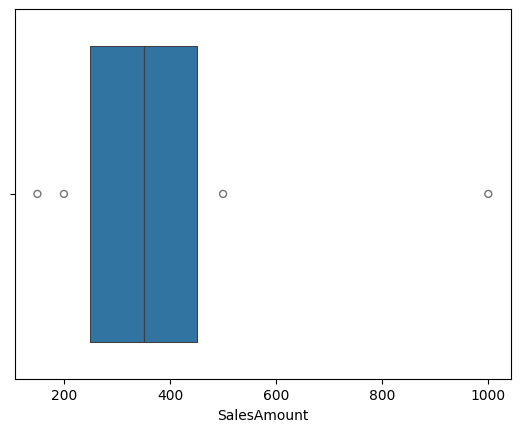

In [18]:
sns.boxenplot(x=df['SalesAmount'])

## Detecting Outliers with Z-Scores

A Z-score represents how many standard deviations a data point is from the mean. A Z-score greater than 3 or less than -3 typically indicates an outlier.

In [19]:
#claculate Z-Score
df['Z_Score'] = stats.zscore(df['SalesAmount'])

In [23]:
# filter out outliers (Z-score >3 or < -3)
df_outliers = df[(df['Z_Score'] > 3) | (df['Z_Score'] < -3)]
df_outliers

,SalesAmount,Z_Score


In [21]:
# Remove outliers from the dataset
df_cleaned = df[(df['Z_Score'] <= 3) & (df['Z_Score'] >= -3)]

In [22]:
df_cleaned

,SalesAmount,Z_Score
0,200,-0.840168
1,150,-1.050210
2,400,0.000000
3,300,-0.420084
4,250,-0.630126
5,350,-0.210042
6,450,0.210042
7,500,0.420084
8,1000,2.520504


In [24]:
# Cap the values at 99th percentile
threshold = df['SalesAmount'].quantile(0.99)
df['SalesAmount'] = df['SalesAmount'].apply(lambda x: min(x, threshold))

In [25]:
df

,SalesAmount,Z_Score
0,200.0,-0.840168
1,150.0,-1.050210
2,400.0,0.000000
3,300.0,-0.420084
4,250.0,-0.630126
5,350.0,-0.210042
6,450.0,0.210042
7,500.0,0.420084
8,960.0,2.520504


## Removing Duplicates

Duplicate data is another common issue that can lead to inaccurate analysis. Pandas provides simple methods for detecting and removing duplicates.

#### Detecting Duplicates

You can use the `duplicated()` function to check for duplicates in the DataFrame. It returns `True` for rows that are duplicates of previous rows.

In [26]:
# samlple data with duplicate 
data = {
    'ProductID': [101, 102, 103, 101, 104, 102],
    'SalesAmount':  [200, 150, 400, 200, 300, 150]
}

df = pd.DataFrame(data)

In [28]:
df

,ProductID,SalesAmount
0,101,200
1,102,150
2,103,400
3,101,200
4,104,300
5,102,150


In [29]:
# detect duplictae
duplicated = df.duplicated()
print(duplicated)

0    False
1    False
2    False
3     True
4    False
5     True
dtype: bool


## Removing duplicates

In [31]:
df_no_duplicate = df.drop_duplicates()

In [32]:
print(df_no_duplicate)

   ProductID  SalesAmount
0        101          200
1        102          150
2        103          400
4        104          300


In [33]:

# Remove duplicates based on 'ProductID' column
df_no_duplicates = df.drop_duplicates(subset=['ProductID'])

In [34]:
print(df_no_duplicate)

   ProductID  SalesAmount
0        101          200
1        102          150
2        103          400
4        104          300


## Handling Inconsistent and Incorrect Data

Inconsistent and incorrect data includes misspelled categories, wrong data types, and incorrect formats. These issues need to be corrected before analysis.

#### Correcting Data Types

It’s essential that columns have the correct data types. For example, dates should be in datetime format, and numerical columns should not be stored as strings.

In [35]:
# sampe DataFrame with incrrect data types 
data = {'ProductID': ['101', '102', '103'], 'Date': ['2024-01-01', '2024-02-01', '2024-03-01']}
df = pd.DataFrame(data)

In [36]:
# convert productId into integer

df['ProductID'] = df['ProductID'].astype(int)

In [37]:
# cnvert date time int date 
df['Date'] = pd.to_datetime(df['Date'])

## Handling Categorical Inconsistencies

Sometimes, categories in a column may be misspelled or have inconsistent formatting. You can use string functions to standardize the format.

In [38]:
data =  {'Region': ['North', 'north', 'SOUTH', 'South']}
df = pd.DataFrame(data)

In [39]:
df

,Region
0,North
1,north
2,SOUTH
3,South


In [40]:
# Standardize the Region names to uppercase
df['Region'] = df['Region'].str.upper()
print(df)

  Region
0  NORTH
1  NORTH
2  SOUTH
3  SOUTH


## Working with Text Data

Text data often requires specific cleaning steps to remove unwanted characters, spaces, or patterns.

Removing Unwanted Characters

You can use string methods to remove unwanted characters from text columns.

In [45]:
# Sample DataFrame with messy text
data = {'Product': [' Product-A  ', ' Product-B ', 'Product-C']}
df = pd.DataFrame(data)

In [46]:
df

,Product
0,Product-A
1,Product-B
2,Product-C


In [47]:
# strip eading /trailing spaces 
df['Product'] = df['Product'].str.strip()

In [48]:
df

,Product
0,Product-A
1,Product-B
2,Product-C


## Replacing text patterns

In [55]:
df['Product'] = df['Product'].str.replace('-', ' ')

In [56]:
df

,Product
0,Product A
1,Product B
2,Product C


## Normalizing and Transforming Data

For numerical data, normalization or scaling is often necessary before analysis or modeling, especially when the data has different units or ranges.

Min-Max Scaling

Min-max scaling transforms the data to a range between 0 and 1.

In [59]:
from sklearn.preprocessing import MinMaxScaler


In [60]:
# Apply log transformation
scaler = MinMaxScaler()
df[['SalesAmount']] = scaler.fit_transform(df[['SalesAmount']])
print(df)

KeyError: "None of [Index(['SalesAmount'], dtype='object')] are in the [columns]"